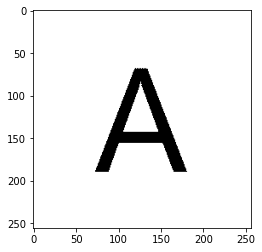

In [86]:
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt
import optimize
import pandas as pd

secret = np.logical_not(np.array(Image.open("../A_256.png").convert("1"), dtype=bool))
plt.imshow(secret, cmap="gray_r")


In [87]:
K = 7
# TIMES = 5
ks = [i for i in range(2, K + 1)]
result = []
ws=50
init_temp=2000
markov=80000
for i in ks:
    result.append(
        optimize.optimize_sa2(i,initial_temp=init_temp,markov=markov*i,  ws=ws))
    print(f"k={i} Done.")


k=2 Done.
k=3 Done.
k=4 Done.
k=5 Done.
k=6 Done.
k=7 Done.


[0.2528307384060406, 0.04744987438811113, 0.11145633756971662, 0.12912805515805648, 0.09850764861431288, 0.053380522851408485]


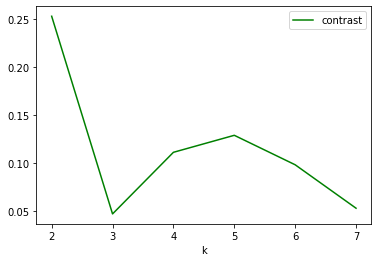

In [88]:
plt.xlabel("k")
plt.plot(ks, list(map(lambda x: x.contrast, result)), label="contrast", color="green")
plt.legend()
print(list(map(lambda x: x.contrast, result)))

In [89]:
from optimize import safety_penalty_list
import os
path=f"./sa2_safety_ws={ws}_inittemp={init_temp}_markov={markov}"
if not os.path.exists(path):
    os.mkdir(path)

safety = []
for res in result:
    safety.append(safety_penalty_list(res.variables))
pd.DataFrame(safety).to_csv(f"{path}/ws.csv")

In [90]:

for i in range(len(result)):
    pd.DataFrame(result[i].variables).to_csv(f"{path}/k={i + 2}.csv")